####  Ejercicio 2.3

In [2]:
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as mp
from math import comb, factorial, exp, sqrt
import scipy.special as sp

In [3]:
# (a) Error absoluto en f(x) = ln(x) para x = 2 y x_tilde = 1.9
x = 2
xtilde_a = 1.9
fx_a = np.log(x)
fxtilde_a = np.log(xtilde_a)
ErrorAbsoluto_a = abs(fx_a - fxtilde_a)

# (b) Error relativo en f(x) = sqrt(x) para x = 2 y x_tilde = 1.95
xtilde_b = 1.95
fx_b = np.sqrt(x)
fxtilde_b = np.sqrt(xtilde_b)
ErrorAbsoluto_b = abs(fx_b - fxtilde_b)
ErrorRelativo_b = ErrorAbsoluto_b / abs(fx_b)

# (c) Error inverso para f(x) = e^x cuando f(2) = e^2 = 8
fx_c = np.exp(2)
xtilde_c = np.log(8)
ErrorInverso_c = abs(2 - xtilde_c)

ErrorAbsoluto_a, ErrorRelativo_b, ErrorInverso_c

(0.05129329438755059, 0.012579117093425152, 0.07944154167983575)

####  2.4 - Without rounding error, the following code’s output would be f (x) = x. (Note that this has nothing to do with catastrophic cancellation.) 

#### Determine what’s going on, remembering our comment (section 2.4) on one or two iterations being the culprits.

In [1]:
from math import sqrt
def f(x,nmax=100):  ### Definimos 1 variable x 
    for i in range(nmax):
        x = sqrt(x) ### De esa variable x, sacamos su raiz cuadrada
    for i in range(nmax):
        x = x**2    ###  Despues elevamos dicho número al cuadrado 
    return x ### Nos retorna ese número
for xin in (5.0, 0.5): 
    xout = f(xin); print(xin, xout)

5.0 1.0
0.5 0.0


Como podemos observar, al realizar las iteraciones, $\sqrt x$ 100 veces, tendríamos la raíz 100 esíma de un número (si pudieramos representar el número de una manera excata, entonces no tendríamos error alguno, elevando al cuadrado este resultado, tendríamos el número que inicialmente propusimos. Sin embargo, dado que no podemos representar, ese número de manera exacta, vamos sumando errores de divisiones (en la parte de las raices) y de multiplicaciones, en la parte de las multiplicacones, lo cual ocasiona este error. 

### 2.5  We now examine a case where plotting a function on the computer can seriouslymislead us. The function we wish to plot is: $f(x) = x^6 + 0.1*log(|1 + 3(1 − x)|)$. Use 100 points from x = 0.5 to 1.5 to plot this function in matplotlib. Do you see a dip? Consider the function itself and reason about what you should be seeing. Then use a much finer grid and ensure that you capture the analytically expected behavior.

<function matplotlib.pyplot.show(close=None, block=None)>

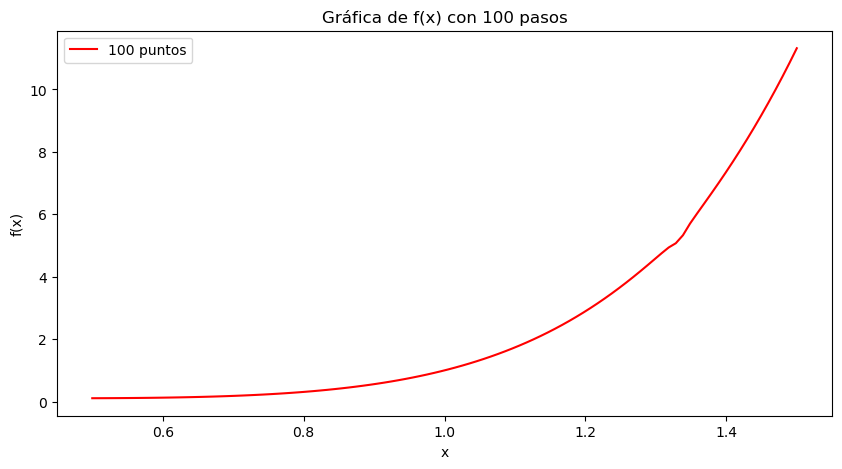

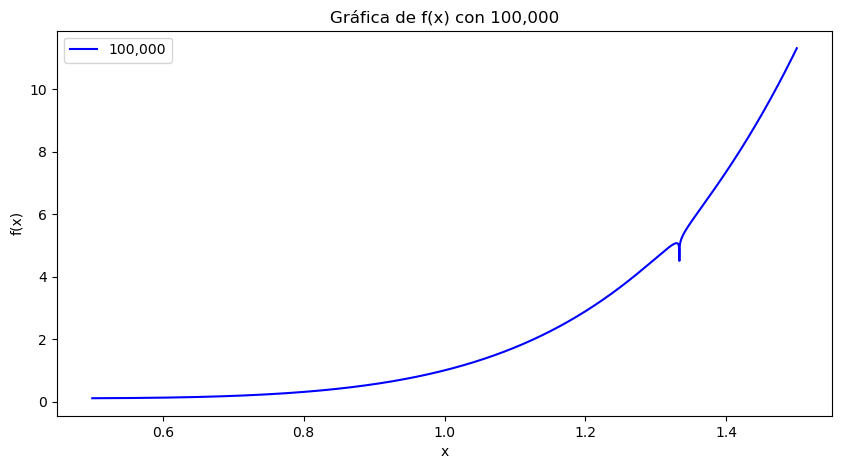

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Se define la función
def f(x):
    return x**6 + 0.1 * np.log(np.abs(1+3*(1-x)))

#Creamos el intervalo donde vamos a trabajar con 100 pasos
x_val= np.linspace(0.5,1.5,100)
#Obtenemos los valores de y para la función dada
y_val= f(x_val)
#Gráfica de la función a 100 pasos
plt.figure(figsize=(10,5))
#Características que quiero que tenga
plt.plot(x_val, y_val, label='100 puntos', color='red')
#El nombre de la gráfica
plt.title('Gráfica de f(x) con 100 pasos')
#Ponemos el nombre al eje x
plt.xlabel('x')
#Ponemos el nombre al eje y
plt.ylabel('f(x)')
plt.legend()
plt.show

#Vamos a comparar la gráfica con una a 100,000 pasos
x_val1=np.linspace(0.5,1.5,100000)
y_val1= f(x_val1)

#Gráfica de la otra función para para comparar
plt.figure(figsize=(10,5))
plt.plot(x_val1, y_val1, label='100,000',color='blue')
plt.title('Gráfica de f(x) con 100,000')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show


### 2.6

In [5]:
# Coeficientes dados
a = 1
b = 1e8
c = 1

# (a) Cálculo de x_ usando la fórmula estándar
x_ = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)

# (b) Cálculo de x+ usando la fórmula estándar (método "malo")
xM_malo = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

# (c) Cálculo de x+ usando el método mejorado (método "bueno")
xM_bueno = c / x_

# Mostrar resultados
print(f"x- = {x_}")
print(f"x+ (método malo) = {xM_malo}")
print(f"x+ (método bueno) = {xM_bueno}")


x- = -100000000.0
x+ (método malo) = -7.450580596923828e-09
x+ (método bueno) = -1e-08


### 2.7 We promised to return to the distinction between catastrophic and benign cancellation. Take y and ˜y to be: $\bar{x} = 1234567891234567.0$  and $\bar{y}= 1234567891234566.0$ .  Now, if we try to evaluate $\bar{x}^2 −\bar{y}^2 $ we will experience catastrophic cancellation: each of the squaring operations leads to a rounding error and then the subtraction exacerbates that dramatically.Write a Python code that does the following:
### (a) Carries out the calculation 12345678912345672 − 12345678912345662 using integers, i.e., exactly.
### (b) Carries out the subtraction 1234567891234567.02−1234567891234566.02 using floats, i.e., exhibiting catastrophic cancellation.
### (c) Now, we will employ a trick: x2 − y2 can be re-expressed as (x − y)(x + y). Try using this trick for the floats and see what happens. Does your answer match the integer answer or the catastrophic-cancellation answer? Why?

In [2]:
### a)
# Definimos las variables enteras
x = 1234567891234567
y = 1234567891234566

# Calculate calculamos el resultado
f_exa = x**2 - y**2
print("El resultado exacto es:", f_exa)

El resultado exacto es: 2469135782469133


In [3]:
### b)
# Definimos las variables float
x_f = 1234567891234567.0
y_f = 1234567891234566.0

# Calculamos el resultado
f_float = x_f**2 - y_f**2
print("El resultado aprox:", f_float)

El resultado aprox: 2533274790395904.0


In [4]:
# c)
dife = x_f - y_f
suma = x_f + y_f
b_c = dife* suma
print("Resultado exibiendo ", b_c)

Resultado exibiendo  2469135782469133.0


Como podemos observar este resultado se asemeja al reultado a) ya que al ser una multiplicación el error, es menor al error, por suma

#### 2.8 We will study the following function: $$ f(x) = \frac{1 - \cos x}{x^2} $$
#### a) Start by plotting the function, using a grid of the form $x = 0.1 \times i$ for $i = 1, 2, \cdots, 100$. This should give you some idea of the values you should expect for $f(x)$ at small $x$.

#### b) Verify your previous hunch by taking the limit as $x \to 0$ and using L'Hôpital's rule.

#### c) Now, see what value you find for $f(x)$ when $x = 1.2 \times 10^{-8}$. Does this make sense, even qualitatively?

#### d) Use a trigonometric identity to avoid the cancellation. Evaluate the new function at $x = 1.2 \times 10^{-8}$ and compare with your analytical answer for $x \to 0$.


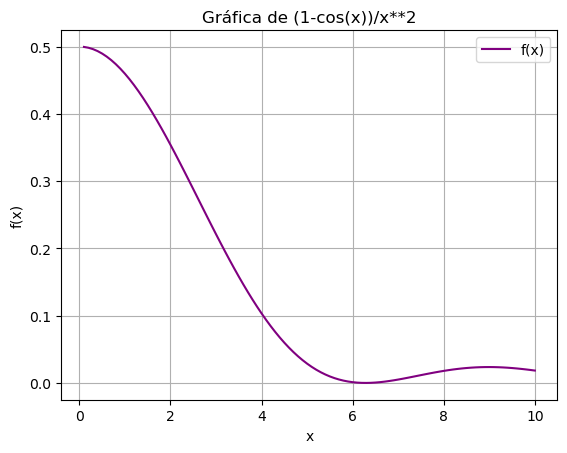

In [6]:
#a)
import numpy as np
import matplotlib.pyplot as plt

#Se define la función
def f(x):
    return (1-np.cos(x))/x**2

#Valor de las variables. Hacemos una lista para tomar los valores de x.
x_val=[]
for i in range(1,101):
    x_val.append(0.1 * i)
#Usamos array 
x_val=np.array(x_val)
y_val=f(x_val)
#Graficamos la función 
plt.plot(x_val,y_val,label='f(x)',color='purple')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de (1-cos(x))/x**2')
#Agregamos cuadricula
plt.grid(True)
plt.legend()
plt.show()


In [7]:
#b)
import sympy as sy

#Definimos la variable simbólica x, como lo hicimos en clase
x=sy.symbols('x')

#Definimos la función f(x)
f_x=(1-sy.cos(x))/x**2

#El límite de f(x) cuando x tiende a 0, usando l'Hopital.
lim_f_x=sy.limit(f_x,x,0)
#Imprimimos el resultado
print(f'El límite de f(x) cuando x tiende a 0 es: {lim_f_x}')

El límite de f(x) cuando x tiende a 0 es: 1/2


In [8]:
#c)
import numpy as np

#El valor de x 
x_val=1.2e-8

#Ponemos la función
f_x_val=(1-np.cos(x_val))/x_val**2

#Imprimimos el resultado
print(f' f(x_val)={f_x_val}')

#El valor es bastante grande, por lo que no tiene sentido. Esto es porque x es muy pequeño y el error se magnifica.

 f(x_val)=0.7709882115452477


In [9]:
#d)
# La identidad trigonométrica para evitar la cancelación es (1-cos(x))=2*sin^2(x/2)

import numpy as np

#Se define el nuevo valor de x
x_val=1.2e-8

#Sustituimos en la función la nueva identidad trigonométrica
f_x_new=(2*np.sin(x_val/2)**2)/x_val**2

#Imprimimos el resultado
print(f'El nuevo valor de la función, ahora es {f_x_new}')

El nuevo valor de la función, ahora es 0.5


### 2.10 As a statistical warmup to chapters 6 and 7, evaluate the mean of the n values $x_i: μ = \sum^{n−1}_{i=0} \dfrac{xi}{n}$. You can evaluate the variance using a two-pass algorithm: 
$σ^2 = \dfrac{1}{n}\sum^{n−1}_{i=0}(x_i − μ)2 $
### This is called a two-pass algorithm because you need to evaluate the mean first, so you have to loop through the xi once to get the mean and a second time time to get the variance. Many people prefer the following one-pass algorithm:
$σ^2 = \dfrac{1}{n}\sum^{n−1}_{i=0}(x_i)^2 - \mu$
### You should be able to see that this formula allows you to keep running sums of the xi and the x2i values in parallel and then perform only one subtraction at the end. Naively, you might think that the two-pass algorithm will suffer from more roundoff error problems, since it involves n subtractions. On the other hand, if you solved problem 2.7 on  $\bar{x}^2 −\bar{y}^2 $ , you might be more wary of subtracting the squares of two nearly equal numbers (which is what the one-pass algorithmdoes).Write two Python functions, one for each algorithm, and test them on the two cases below:
$xi = 0, 0.01, 0.02, . . . , 0.09 ~~~~~~$ 
$xi = 123456789.0, 123456789.01, 123456789.02, . . . , 123456789.09$ 

In [5]:
import numpy as np

def dos_pasos(val):
    #### Al sacar la media debemos ver cuantos elementos tenemos por ende hacemos un conteo de los mismos
    #### con respecto a loos valores ingresados.
    n = len(val)
    # Calculamos la media
    media = sum(val) / n
    # Calculamos la varianza
    var = sum((x - media)** 2 for x in val) / n
    return media, var

def un_paso(val):
    n = len(val)
    #### Definimos un origen del cual con ese mismo, empezaremos a hacer dos sumas
    ####  una para calcular la media y otra para calcular los momentos segundos
    suma_x = 0
    suma_x_cuadra = 0
 
    for x in val:
        #### calculamos los valores de los cuales obtendremos los momentos cuadradados y las medianas 
        suma_x += x 
        suma_x_cuadra += x**2
    media = suma_x / n 
    var = (suma_x_cuadra) /n - (media **2)
    return media, var 

# Define the test cases
caso_1  = [0 + i * 0.01 for i in range(10)]    # [0, 0.01, 0.02, ..., 0.09]
caso_2  = [123456789.0 + i * 0.01 for i in range(10)] # [123456789.0, 123456789.01, ..., 123456789.09]

# Calculando la media y varianza usando dos pasos: 
media_1 , var_1 = dos_pasos(caso_1)
media_2, var_2 = dos_pasos(caso_2)

# Calculando la media y varianza usando dos pasos: 
media_3 , var_3 = un_paso(caso_1)
media_4, var_4 = un_paso(caso_2)

print('La media es:' ,  media_1 , 'La varianza es: ' , var_1)

print('La media es:' ,  media_2 , 'La varianza es: ' , var_2)

print('La media es:' ,  media_3 , 'La varianza es: ' , var_3)

print('La media es:' ,  media_4 , 'La varianza es: ' , var_4)

La media es: 0.045000000000000005 La varianza es:  0.0008249999999999997
La media es: 123456789.04499996 La varianza es:  0.0008249999612588655
La media es: 0.045000000000000005 La varianza es:  0.0008249999999999998
La media es: 123456789.04499996 La varianza es:  10.0


#### 2.11 This problem discusses error buildup when trying to evaluate polynomials without and with the use of Horner's rule. Take a polynomial of degree $n - 1$:
$$
P(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3 + \cdots + p_{n-1} x^{n-1}
$$

### Write a function that takes in a list containing the $p_i$'s, say \texttt{coeffs}, and the point $x$ and evaluates the value of $P(x)$ in the naive way, i.e., from left to right. Notice that this way of coding up the polynomial contains several (needless) multiplications. This is so because $x^i$ is evaluated as $x \times x \times x \cdots \times x$ (where there are $i-1$ multiplications). Thus, this way of approaching the problem corresponds to:
$$
1 + 2 + 3 + \cdots + n - 2 = \frac{(n-1)(n-2)}{2}
$$
### multiplications, from $x^2$ all the way up to $x^{n-1}$. 

### If we rewrite the polynomial:
$$
P(x) = p_0 + x \big( p_1 + x \big( p_2 + x \big( p_3 + \cdots + x \big( p_{n-2} + x p_{n-1} \big) \cdots \big) \big) \big) 
$$
### then we can get away with only $n-1$ multiplications (i.e., no powers are evaluated). This is obviously more efficient, but equally important is the fact that this way we substantially limit the accumulation of rounding error (especially for polynomials of large degree). 

### Write a function that takes in a list containing the $p_i$'s, say coeffs, and the point $x$ and evaluates the value of $P(x)$ in the new way, i.e., from right to left. Apply the previous two functions to the (admittedly artificial) case of:
$$
\texttt{coeffs = } \{k^{11} + k^i \text{ for } i \text{ in reversed(range(8))} \}
$$
### and $x = 11.01$. Observe any discrepancy and discuss its origin.


In [10]:
def naive(C,x):
    Px=0
    for i in range(len(C)):
        Px=Px+C[i]*x**i
    return Px
coeffs= [(-11)**i for i in reversed(range(8))]
print("El resultado usando naive es: ", naive(coeffs,11.01))

El resultado usando naive es:  71056.02362162992


In [11]:
def horner(coeffs,x):
    #Empezamos de atrás a adelante
    result=coeffs[-1]
    x=11.01
    #Iteramos con i del penúltimo al primero
    for i in range(len(coeffs)-2,-1,-1):
    #El algoritmo es
        result=result*x+coeffs[i]
    return result
#El resultado con la regla de Horner
horner_result=horner(coeffs,x)
print("El resultado usando Horner es: ", horner_result)
#Usando Horner es más preciso que de la forma naive.

El resultado usando Horner es:  71056.02362163365


### 2.12

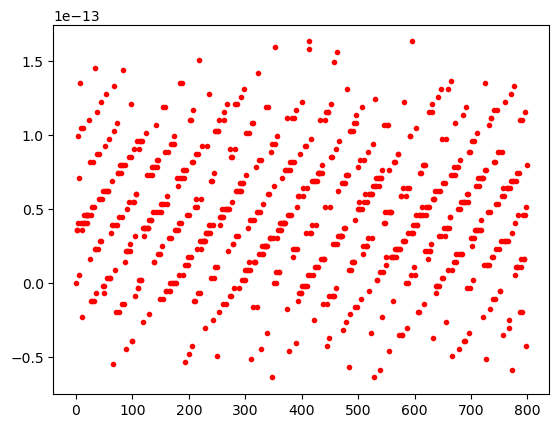

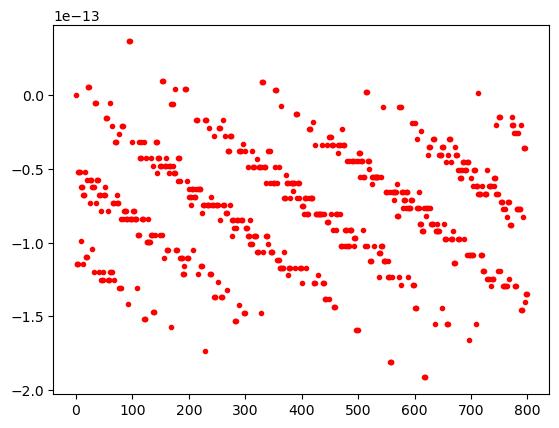

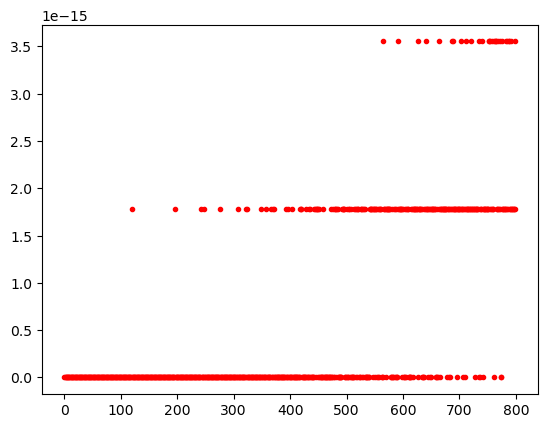

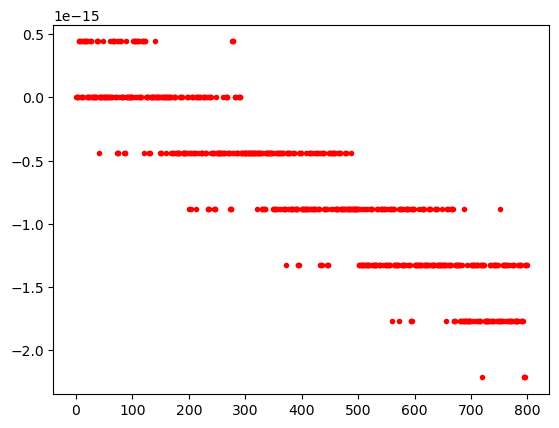

In [12]:
import matplotlib.pyplot as mp

#(a) Función racional utilizando la regla de Horner
def r(x):
    # Definimos el numerador y denominador
    A = 4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622
    B = x**4 - 14*x**3 + 72*x**2 - 151*x + 112
    return A / B

# Puntos proporcionados
X = np.arange(0, 800, 1)
x1 = 1.606 + 2**-52 * X
x2 = 2.400 + 2**-52 * X

# Evaluación de la función en x1 y x2
r_x1 = r(x1)
r_x2 = r(x2)


Y1 = r_x1 - r(1.606)
mp.plot(X, Y1, 'r.')
mp.show()

Y2 = r_x2 - r(2.400)
mp.plot(X, Y2, 'r.')
mp.show()

#(b) Definimos una nueva función 
def s(x):
    C = 3*(x-2)*((x-5)**2 + 4)
    D = x + ((x-2)**2)*((x-5)**2 +3)
    return 4 - (C/D)

Y3 = s(x1) - s(1.606)
mp.plot(X, Y3, 'r.')
mp.show()

Y4 = s(x2) - s(2.400)
mp.plot(X, Y4, 'r.')
mp.show()

### 2.13 This problem studies a new rational function: $t(x) =\dfrac{7x^4 − 101x^3 + 540x^2 − 1204x + 958}{x^4 − 14x^3 + 72x^2 − 151x + 112}$
### Notice that the denominator is the same as in problem 2.12. 
### (a) Plot t(x), evaluated via Horner’s rule, along with the following (equivalent) continued fraction, from x = 0 to x = 4: $u(x) = 7 −  \dfrac{3}{ x - 2 \dfrac{1}{x- 7 + \dfrac{10}{ x -2 +  \dfrac{2}{x-3}}} }$ You may wish to know that: u(1) = 10, u(2) = 7, u(3) = 4.6, u(4) = 5.5 (2.104)
### (b) Evaluate each of these functions for x = 1077 (make sure to use floats in your code). Do you understand what is happening? Are you starting to prefer one formulation over the other? (What happens if you use integers instead of floats?)
### (c) Plot the two Python functions (t(x) and u(x)) for x = 2.400 + 2−52i, where i goes from 0 to 800.Was your intuition (about which formulation is better) correct?

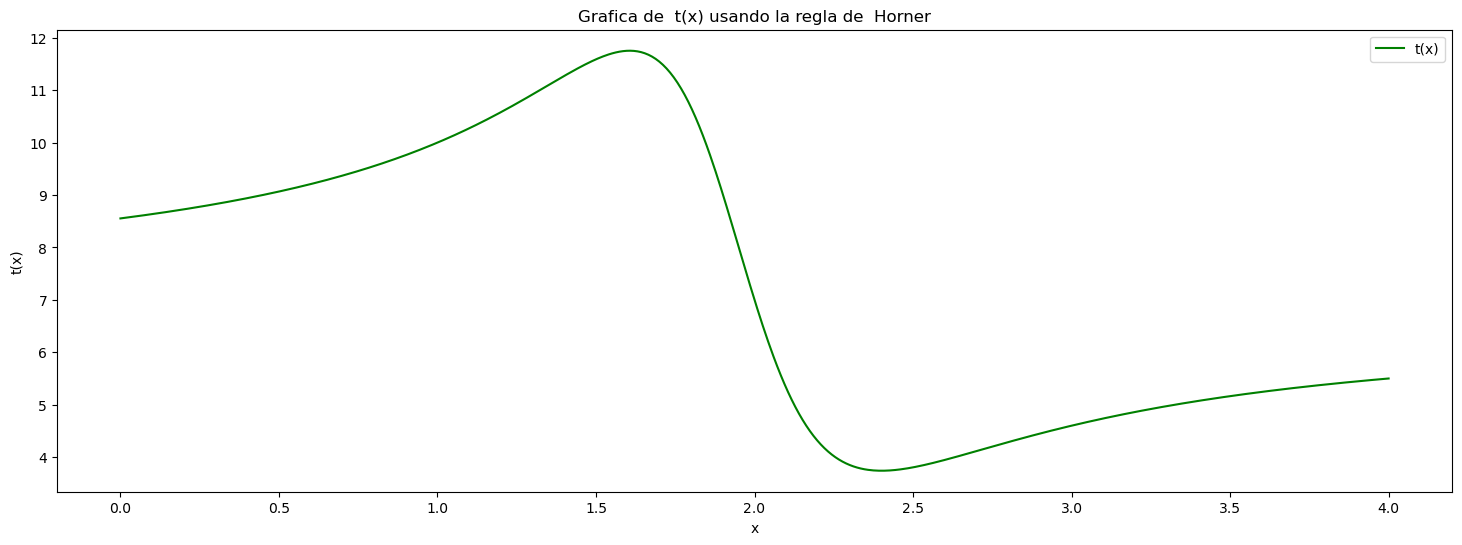

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### a) 
def naive(C,x):
    Px = 0
    for i in range(len(C)):
        Px  = Px + C[i]*x**i
    return Px 

def horner(C,x): 
    Px = 0
    for c in reversed(C):
        Px = c + x*Px
    return Px 

def t(x):
    ### Definimos el numerador y el denominador de la función
    n = horner([958,-1204,540, -101, 7],x)
    d = horner([112,-151,72,-14, 1],x)
    return n / d
#### Creamos todo el espacio de las x, donde va a correr nuestra función
x_v  = np.linspace(0,4,700)
t_v = t(x_v)
### Definimos el tamaño de la figura tanto en x como y
plt.figure(figsize=(18, 6))
#### x vs t 
plt.plot(x_v, t_v, label='t(x)', color='green')
plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('Grafica de  t(x) usando la regla de  Horner')
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2392\2568714644.py:8: RuntimeWarning: divide by zero encountered in divide
  frac_4 = 10 / frac_3


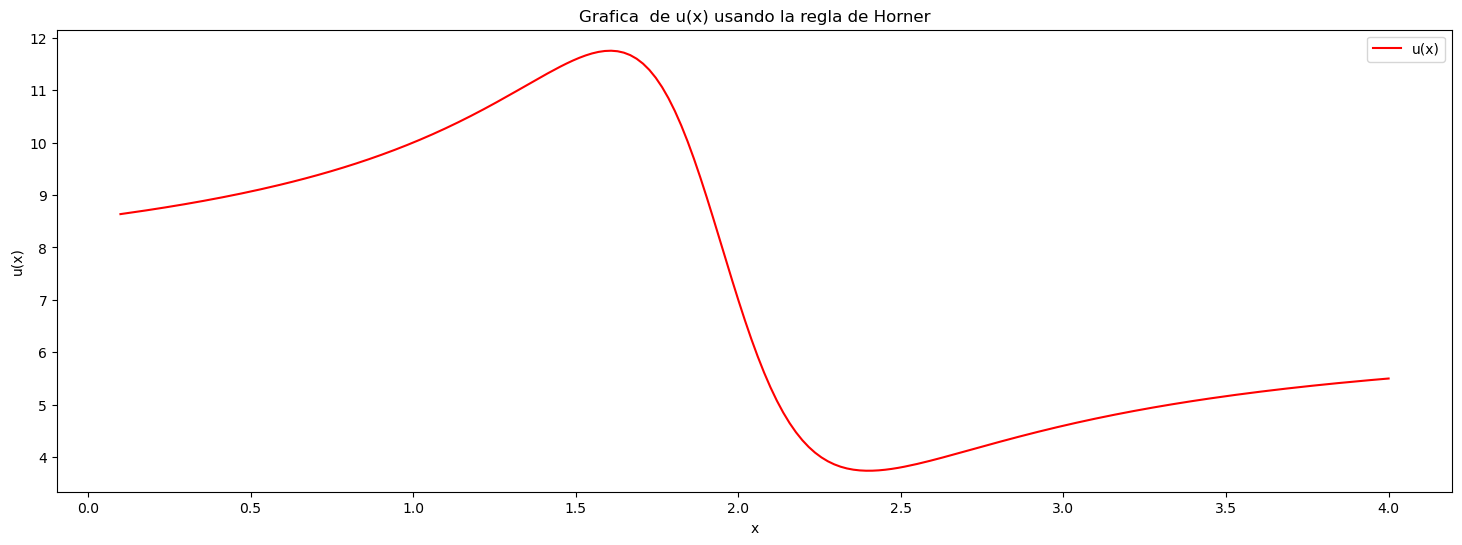

In [7]:
### a)

def u(x):
    # Definimos la función anidada, usando diviciones  a las cuales denomine como fracciones
    frac_1 = x - 3
    frac_2 = 2 / frac_1
    frac_3 = x - 2 - frac_2
    frac_4 = 10 / frac_3
    frac_5 = x - 7 + frac_4
    frac_6 = 1 / frac_5
    frac_7 = x - 2 - frac_6
    frac_8 = 3 / frac_7
    return 7 - frac_8
#### Usando las definiciones que le dimos a las x a usar, tenemos que, evaluando el resultado
#### en el mismo espacio que en la función continua.

x_v  = np.linspace(0.1,4,200)
u_v = u(x_v)

plt.figure(figsize=(18, 6))
plt.plot(x_v, u_v, label='u(x)', color='red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Grafica  de u(x) usando la regla de Horner')
plt.legend()
plt.show()
### Un error ocurre debido a la divisón sobre 10.

In [8]:
### b) 
a = 10000000000000000.0
t_g = t(a)
u_g = u(a)

print(t_g, u_g)

### Como podemos ver, a numeros muy grandes, ambas partes convergen en en el mismo limite, cuando x tiende
### a infinito, t y u tienden a 7 sin, embargo, siguen existiendo estas diferencias palpables de que el redondeo
### sigue afectando al error, donde u, converge un poco más rapido que t 

7.0 7.0


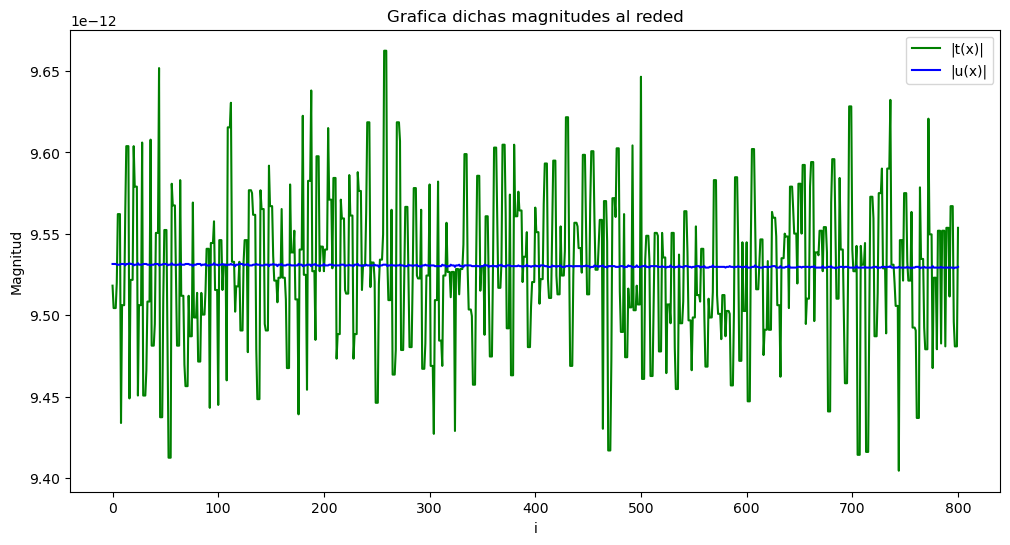

In [9]:
### c)
#### Utiliazamos la función de honer, la cual nos replica el polinomio de n grado
def horner(C,x): 
    Px = 0
    for c in reversed(C):
        Px = c + x*Px
    return Px 

def t_compleja(x):
    ### Definimos el numerador y el denominador de la función
    n = horner([958,-1204,540, -101, 7],x)
    d = horner([112,-151,72,-14, 1],x)
    return n / d


def u_compleja(x):
    frac_1 = x - 3
    frac_2 = 2 / frac_1
    frac_3 = x - 2 - frac_2
    frac_4 = 10 / frac_3
    frac_5 = x - 7 + frac_4
    frac_6 = 1 / frac_5
    frac_7 = x - 2 - frac_6
    frac_8 = 3 / frac_7
    return 7 - frac_8

#### En numpy podemos trabajar con los numeros complejos, así que definimos, un arreglo de números complejos
### dicho arreglo será contruido con el uso de pequeños segmentos del error de maquina
i_v = np.arange(0, 801)
x_compleja  = 2.400 + 2**(-52)* i_v

### Les dotamos los valores complejos a nuestras funciones (Completa, Horner)
t_com_v = t_compleja(x_compleja)
u_com_v = u_compleja(x_compleja)

plt.figure(figsize=(12, 6))
#### Usando el plano del los complejos, podemos ver que, la magnitud de La función compleja y la de Horner
#### varía, denotando, que de hecho una es másconfiable que la otra.
plt.plot(i_v, -3.74071082390 + np.abs(t_com_v), label='|t(x)|', color='green')
plt.plot(i_v,  -3.74071082390 + np.abs(u_com_v), label='|u(x)|', color='blue')
plt.xlabel('i')
plt.ylabel('Magnitud')
plt.title('Grafica dichas magnitudes al reded')
plt.legend()
plt.show()

#### Dado que la función de horner, convergia mas rapido, supusimos que dicha función era  una mejor aproximación
### Y de hecho lo es, porque, mientrás más información caiga en los reales, menor información se pierde en general

#### 2.14 In compexp.py we employed the Taylor series for $e^x$. Do the same for $f(x) = \sin x$ at $x = 0.1$ and $x = 40$. Just like we did in the main text, you will first need to find a simple relation between the $n$-th term and the $(n-1)$-th term in the series. Then, use a trigonometric identity to study an equivalent (smaller) $x$ instead of $40$.

In [13]:
import math

def taylor_sin(x,n=10):
    #Calcula sin(x) con la serie de Taylor hasta n términos.
    result=0
    #Primer término
    term=x
    for n in range(n):
        result +=term
        #Términos nuevos
        term *= -x**2/((2*n+2)*(2*n+3))
    return result
#
#Evaluando en x=0.1
x1=0.1
sin_x1=taylor_sin(x1)
print(f"sin({x1}) usando la serie de Taylor: {sin_x1}")

# Evaluación con x=40
k=40
#Estamos pasando el argumento de sin a radianes
x2=k*(math.pi/180)
sin_x2=taylor_sin(x2)
print(f"sin(40) usando la serie de Taylor con x= {x2}: {sin_x2}")

#Comparamos el método con serie de Taylor y el valor exacto
real_sin_x1=math.sin(x1)
real_sin_x2=math.sin(x2)
print(f"Valor exacto de sin({x1}):",{real_sin_x1})
print(f"Valor exacto de sin(40): ",{real_sin_x2})

sin(0.1) usando la serie de Taylor: 0.09983341664682817
sin(40) usando la serie de Taylor con x= 0.6981317007977318: 0.6427876096865393
Valor exacto de sin(0.1): {0.09983341664682815}
Valor exacto de sin(40):  {0.6427876096865393}


### 2.15 

In [14]:
# Definimos la función de Basel

def Basel(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
    return b

print(Basel(94906000))
nmaxd=94906000

1.6449340578345162


In [15]:
#Besel en reversa
def Baselr(x):
    br=0
    for i in range (x,0,-1):
        br=br+1/i**2
    return br
nmaxr=4*nmaxd
print (Baselr(nmaxr))

1.644934064214041


In [17]:
def kahansum(x):
    s = 0.; c = 0.
    for i in range(1, x + 1):
        term = 1 / (i ** 2)
        y = term - c  # Compensa el error acumulado
        temp = s + y  # Suma compensada
        c = (temp - s) - y  # Actualiza la compensación
        s = temp  # Actualiza la suma
    return s

def s(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
        
    return b

def sumak(x):
    return kahansum(x)-s(x)
print (Basel(nmaxd))
print (Baselr(nmaxr))
print (sumak(nmaxd))
print (sumak(nmaxr))

1.6449340578345162


KeyboardInterrupt: 

### 2.16  In this problem we will learn how to accelerate the convergence of a sequence. We will accomplish this by transforming a sequence $p_n$ obeying $limn→∞ p_n = ξ$ into another sequence qn that converges more quickly to ξ.
### (a) Assume the sequence $p_n$ converges to ξ like a geometric series with a factor C: $p_{n+1} − ξ = C(p_n − ξ)$, n = 1, 2, . . .  
### Apply this equation a second time taking n → n + 1 and then eliminate C; you can then solve the resulting equation for ξ. This takes the form:
### $q_n = p_n - \dfrac{ (p_{n+1} − p_n)^2}{p_n + p_{n+2} − 2p_{n+1} } $
### where we took the opportunity to write qn on the left-hand side (instead of ξ) to emphasize that this is a new sequence (in practice, the starting relation Eq. is likely to be only approximately valid). This technique is known as Aitken extrapolation or Aitken’s $Δ^2$ method.
### (b) We will now apply Aitken extrapolation, Eq. (2.107), to the following problem: 
### $\sum_{k = 1}^{\infty}(-1)^{ k +1} = ln 2 = 0.693 147 180 559 945 3 . . . $ 
### To do so, treat the partial sums as the terms of your original sequence: 
$p_n = \sum_{k=1}^{n} (−1)^{k+1} k$ 
### You should find that when n = 100 or so the Aitken-extrapolated qn’s have converged on six significant figures of the true answer, whereas the (untransformed) partial sums pn’s are still struggling with the second significant figure.

In [10]:
### a) se encuetra en las notas

In [11]:
### b) 

import numpy as np

# Definimos la suma en terminos de p:
def suma_p(n):
    return np.sum([(-1)**(k+1) / k for k in range(1, n+1)])

# Definimos el termino de extrapolación con sus respectivos
# donde dicho termino qn, esta determinado del pn, pn1 y pn2
def ait_extrapolacion(pn, pn1, pn2):
    num = (pn1 - pn) ** 2
    deno = pn2 - 2 * pn1 + pn
    if deno != 0:
        return pn - num / deno
    else:
        return np.nan  # Esta parte se agrega debido a que queremos
    ### evitar a división por cero, por ende, evitamos a toda
    ### costa este númer0

# Definamos la suma parcial, incluyendo dicha suma en un arreglo
n = 100
sumas_par = [suma_p(i) for i in range(1, n+1)]

# Creamos una lista de la extrapolación obtenida por el metodo
# expuesto, para que de esa lista comparemos con el valor esperado
ait_extrapolacion_v = []

# Aplicamos el metodo de extrapolación a cada suma parcial tal que 
for i in range(1, len(sumas_par) - 1):
    pn = sumas_par[i - 1]
    pn1 = sumas_par[i]
    pn2 = sumas_par[i + 1]
    ### Genera los pn y los coloca en la funcion de estrapolacion
    qn = ait_extrapolacion(pn, pn1, pn2)
    ait_extrapolacion_v.append(qn)

# Calculamos el valor del logaritmo
valor_real = np.log(2)

# Comparemos los valores obtenidos por el metodo y comparemoslo con el valor real
# donde cada i representa una n donde se aplicó

for i in range(len(ait_extrapolacion_v)):
    print("Diferencia con el valor real: ", abs( ait_extrapolacion_v[i] - valor_real ))

Diferencia con el valor real:  0.006852819440054669
Diferencia con el valor real:  0.0026709900837548206
Diferencia con el valor real:  0.0012972638844991335
Diferencia con el valor real:  0.0007229381357030107
Diferencia con el valor real:  0.0004425630297982819
Diferencia con el valor real:  0.0002900377028024481
Diferencia con el valor real:  0.0002001583756289227
Diferencia con el valor real:  0.00014383887239310944
Diferencia con el valor real:  0.00010678769402305832
Diferencia con el valor real:  8.142988549886265e-05
Diferencia con el valor real:  6.349765073299096e-05
Diferencia con el valor real:  5.04624632271522e-05
Diferencia con el valor real:  4.07617659281545e-05
Diferencia con el valor real:  3.33947042238103e-05
Diferencia con el valor real:  2.7700114935469422e-05
Diferencia con el valor real:  2.3229347758668695e-05
Diferencia con el valor real:  1.967069514130504e-05
Diferencia con el valor real:  1.680302554296631e-05
Diferencia con el valor real:  1.4466517921696

### 2.18 In section 2.4.5 backward recursion avoided the problems of forward recursion. Another example is provided by \textit{spherical Bessel functions} (of the first kind):
$$
j_{n+1}(x) + j_{n-1}(x) = \frac{2n+1}{x} j_n(x)
$$
### which is analogous to Bonnet's recurrence relation, Eq. (2.86). Evaluate $j_8(0.5)$ in the "naive way," starting from the known functions:
$$
j_0(x) = \frac{\sin x}{x}, \quad j_1(x) = \frac{\sin x}{x^2} - \frac{\cos x}{x} 
$$
### and see what goes wrong. Then, use backward recursion starting from $n = 15$. Since your two starting guesses are arbitrary, you should normalize by computing:
$$
j_8(0.5) = \frac{j_8(0.5)}{j_0(0.5)} \cdot j_0(0.5) 
$$
### at the end, where $j_0(0.5)$ and $j_8(0.5)$ are the values you computed and $j_0(0.5)$ is the correctly normalized value from Eq. (2.111).


In [18]:
import numpy as np

# Definimos j_0(x) y j_1(x)
def j_0(x):
    return np.sin(x) / x if x != 0 else 1 

def j_1(x):
    return (np.sin(x) / x**2 - np.cos(x) / x) if x != 0 else 0

# Relación de recurrencia 
def r_f(j_n_menos_1, j_n, n, x):
    return (2 * n + 1) / x * j_n - j_n_menos_1

def r_b(j_n_mas_1, j_n, n, x):
    return (2 * n + 1) / x * j_n - j_n_mas_1

# Paso 3: Recursión hacia adelante para calcular j_8(0.5)
def f_r(x, k=8):
    j_n_menos_1 = j_0(x)  # j_0(x)
    j_n = j_1(x)  # j_1(x)

    # Iterar hacia adelante hasta j_8(x)
    for n in range(1, k):
        j_n_mas_1 = r_f(j_n_menos_1, j_n, n, x)
        j_n_menos_1, j_n = j_n, j_n_mas_1  # Actualizar valores

    return j_n

# Paso 4: Recursión hacia atrás para calcular j_8(0.5)
def b_r(x, k=8, nmax=15):
    # Valores iniciales arbitrarios para j_{15}(x) y j_{14}(x)
    j_n_mas_1 = 1.0  # Valor arbitrario para j_{15}(x)
    j_n = 1.0  # Valor arbitrario para j_{14}(x)

    # Iterar hacia atrás desde n = 15 hasta n = 0
    for n in range(nmax, 0, -1):
        j_n_menos_1 = r_b(j_n_mas_1, j_n, n, x)
        j_n_mas_1, j_n = j_n, j_n_menos_1  # Actualizar valores

    # Normalizar usando j_0(x)
    j_0_x = j_0(x)
    norm = j_0_x / j_n
    j_8_x = norm * j_n_menos_1  # j_8(x)

    return j_8_x

# Paso 5: Comparar ambos métodos para x = 0.5
x = 0.5
j_8_f = f_r(x)
j_8_b = b_r(x)

print(f"j_8(0.5) usando recursión hacia adelante: {j_8_f:.6e}")
print(f"j_8(0.5) usando recursión hacia atrás: {j_8_b:.6e}")


j_8(0.5) usando recursión hacia adelante: -1.658522e-08
j_8(0.5) usando recursión hacia atrás: 9.588511e-01


### 2.18

In [23]:
# Función para la onda cuadrada
def square_wave(x):
    return np.where((x > 0) & (x < np.pi), 0.5, -0.5)

# Función para la expansión de Fourier
def fourier_series(x, nmax):
    sum_value = 0
    for n in range(1, nmax + 1, 2):  # Solo n impares
        sum_value += (2 / np.pi) * (np.sin(n * x) / n)
    return sum_value

nmax=5
print (square_wave(-3))
print (fourier_series(np.pi/2,1))

-0.5
0.6366197723675814


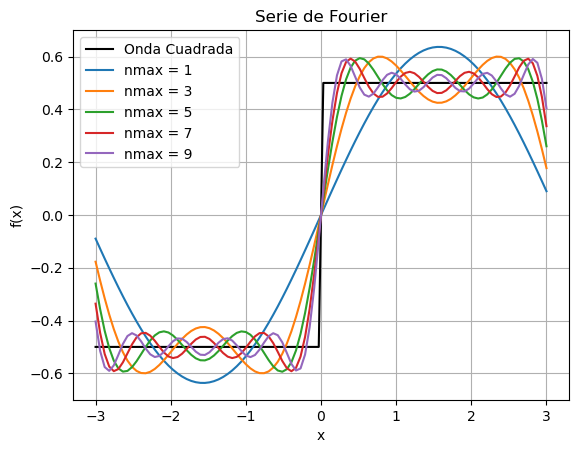

In [46]:
# Valores de nmax
nmax_values = [1, 3, 5, 7, 9]
x = np.linspace(-3 ,3,100)
# Graficar la onda cuadrada original
mp.plot(x, square_wave(x), label='Onda Cuadrada', color='black')

# Graficar las aproximaciones de Fourier
for nmax in nmax_values:
    mp.plot(x, fourier_series(x, nmax), label=f'nmax = {nmax}')

mp.title('Serie de Fourier')
mp.xlabel('x')
mp.ylabel('f(x)')
mp.legend()
mp.grid(True)
mp.show()


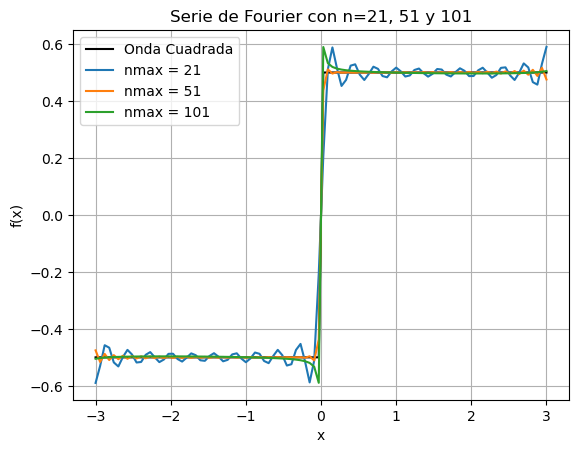

In [47]:
# Valores más grandes de nmax
nmax_large_values = [21, 51, 101]

# Graficar la onda cuadrada original
mp.plot(x, square_wave(x), label='Onda Cuadrada', color='black')

# Graficar las aproximaciones de Fourier para grandes nmax
for nmax in nmax_large_values:
    mp.plot(x, fourier_series(x, nmax), label=f'nmax = {nmax}')

mp.title('Serie de Fourier con n=21, 51 y 101')
mp.xlabel('x')
mp.ylabel('f(x)')
mp.legend()
mp.grid(True)
mp.show()

### 2.19   Compare the output of legendre.py with that of the recurrence relation for n = 1000: 
### $P_n(x) = 2xP_{n−1}(x) − P_{n−2}(x) − \dfrac{xP_{n−1}(x) − P_{n−2}(x)}{n} $


In [12]:
def primera_recurrencia(x, n_max):
    Q = np.zeros(n_max + 1)  # Creamos un arreglo para almacenar los valores
    Q[0] = 1  #### Creamos los valores base 
    Q[1] = x  
    
    # Calcular los valores de Pn(x) usando la relación de recurrencia
    for n in range(1, n_max):
        Q[n+1] = ((2* n + 1)* x* Q[n] - n*Q[n-1])/(n+1)
    return Q


def segunda_recurrencia(x, n_max):
    P = np.zeros(n_max + 1)   # Creamos un arreglo para almacenar los valores
    P[0] = 1   ### Creamos los valores base
    P[1] = x  
    
    # Calculamos los valores de Pn(x) usando la relación de recurrencia
    for n in range(2, n_max + 1):
        P[n] = 2 * x * P[n-1] - P[n-2] - (x * P[n-1] - P[n-2]) / n
    
    return P

x = 4.0  # Definimos a x  y a n (interacciones)
n_max = 100  

# veamos la diferencia de cada uno. 
P = primera_recurrencia(x, n_max)
Q = segunda_recurrencia(x, n_max)
B = Q - P 
abs(B) 

#### Los errores de recurrencia se ven afectado en gran medida cuando se va aumentando a n 

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.90625000e-03, 3.12500000e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.55360000e+04, 1.04857600e+06, 8.38860800e+06, 1.00663296e+08,
       5.36870912e+08, 6.44245094e+09, 5.15396076e+10, 4.12316860e+11,
       2.74877907e+12, 1.75921860e+13, 1.05553116e+14, 2.81474977e+14,
       4.50359963e+15, 3.60287970e+16, 1.44115188e+17, 0.00000000e+00,
       0.00000000e+00, 7.37869763e+19, 5.90295810e+20, 4.72236648e+21,
       3.77789319e+22, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.54742505e+26, 2.47588008e+27, 2.97105609e+28, 1.58456325e+29,
       1.26765060e+30, 1.01412048e+31, 8.11296384e+31, 3.24518554e+32,
      

#### 2.21

In [29]:
from math import comb

def bernoulli_number(n):
    # Casos base conocidos
    if n == 0:
        return 1.0  # B_0 = 1.0
    if n == 1:
        return -0.5  # B_1 = -0.5
    
    # Los números de Bernoulli para n impar (excepto n=1) son 0
    if n % 2 == 1:
        return 0.0
    
    # Cálculo por recurrencia para n par
    result = 0.0
    for k in range(n):
        result += comb(n, k) * bernoulli_number(k) / (n + 1 - k)
    
    return -result

print (bernoulli_number(20))


-529.1242423296121


### 2.22  This problem studies the evaluation of Chebyshev polynomials and their extrema, known as Chebyshev points. First, implement the following recurrence relation:
$T_{n+1}(x) = 2xT_n(x) − T_{n−1}(x)$
### starting from the known functions T0(x) = 1 and T1(x) = x. Plot the first few Chebyshev polynomials from x = −1 to x = +1. Second, use trigonometric identities to show (analytically) that the representation:
$T_n(x) = cos(n cos^{−1} x)$
### Numbers is equivalent to that in Eq. (2.122). Finally, use Eq. (2.123) to show that the n extrema of Tn−1(x) are:
$x_j = − cos(jπ/n − 1)~~~~~ j = 0, 1, . . . , n − 1$

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.         -0.99331104 -0.98662207 ...  0.98662207  0.99331104
   1.        ]
 [ 1.          0.97333363  0.94684623 ...  0.94684623  0.97333363
   1.        ]
 ...
 [ 1.          0.76845998  0.55491926 ...  0.55491926  0.76845998
   1.        ]
 [-1.         -0.68943115 -0.41187509 ...  0.41187509  0.68943115
   1.        ]
 [ 1.          0.60117916  0.25781085 ...  0.25781085  0.60117916
   1.        ]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.         -0.99331104 -0.98662207 ...  0.98662207  0.99331104
   1.        ]
 [ 1.          0.97333363  0.94684623 ...  0.94684623  0.97333363
   1.        ]
 ...
 [ 1.          0.76845998  0.55491926 ...  0.55491926  0.76845998
   1.        ]
 [-1.         -0.68943115 -0.41187509 ...  0.41187509  0.68943115
   1.        ]
 [ 1.          0.60117916  0.25781085 ...  0.25781085  0.60117916
   1.        ]]


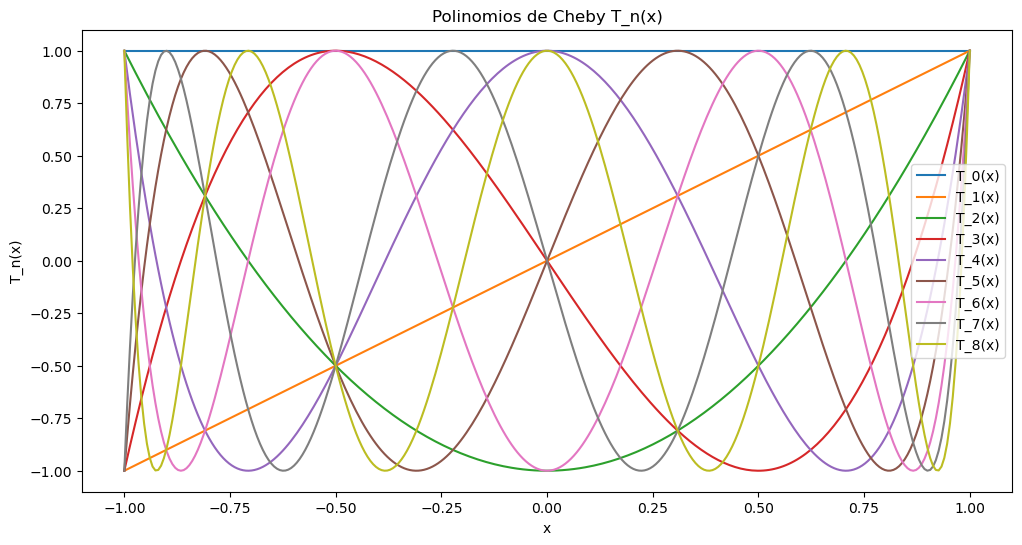

In [13]:
### a) 
import numpy as np
import matplotlib.pyplot as plt

def Polinomio_Chevy(n, x):
    T = np.zeros((n + 1, len(x))) ### Creamos una matriz doble, la cual colocará
    #### los valores de los polinomios, con respecto al tamaño de la muestra (x)
    T[0, :] = 1
    T[1, :] = x
    
    ### Definimos los 2 primeros valores
    for i in range(2, n + 1):
        
        #### Hacemos las iteraciones hasta cortar los polinomios donde queramos 
        T[i, :] = 2 * x * T[i-1, :] - T[i-2, :]
    print(T)   
    return T

# Definimos los valores los cuales nuestro polinomio vivira
x = np.linspace(-1, 1, 300)

### Asignamos el numero al cual cortar los polinomios de chevy y a su vez una matriz con estos valores 
n_max = 8
T = Polinomio_Chevy(n_max, x)
### Ploteamos como serían los valores del polinomio número 6
print(T[:, :])

# Creamos la grafica donde vivirá nuestra información
plt.figure(figsize=(12, 6))
for i in range(n_max + 1):
    #### Ploteamos los 6 polinomios de chevy
    plt.plot(x, T[i, :], label= f'T_{i}(x)')

plt.xlabel('x')
plt.ylabel('T_n(x)')
plt.title('Polinomios de Cheby T_n(x)')
plt.legend()
plt.show()


In [14]:
### b) Dicha parte se encuentra en los apuntes

### 2.23 Using vectorfield.py and chargearray.py, produce panels analogous to those in Fig. 2.4, made up of 36 charges (along six rows and six columns). In this problem, in addition to changing the magnitude of the charges (to either $+1$ or $-1$) you should also change their placement (i.e., they no longer need to be alternating as in our figure). Separately investigate the cases where the field at large distances behaves like: a dipole and a quadrupole.


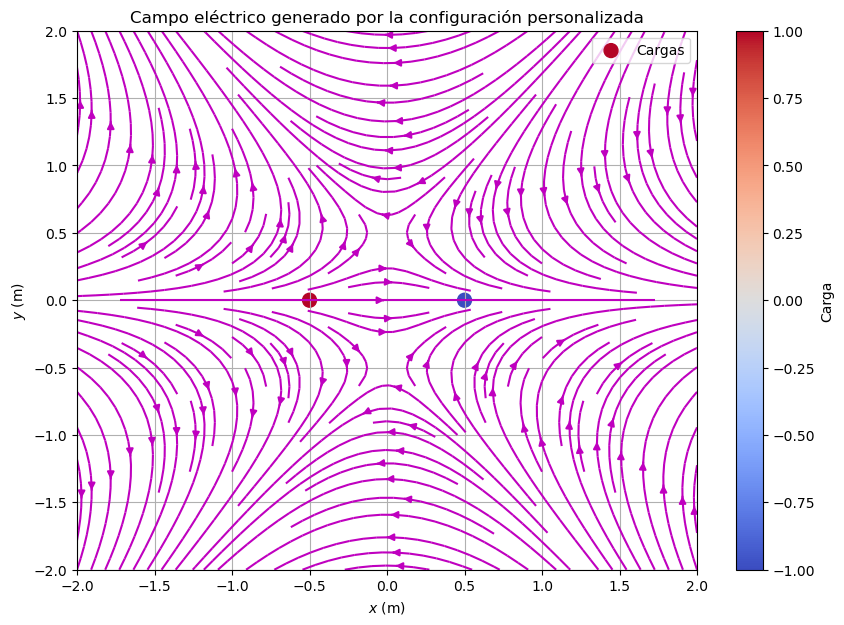

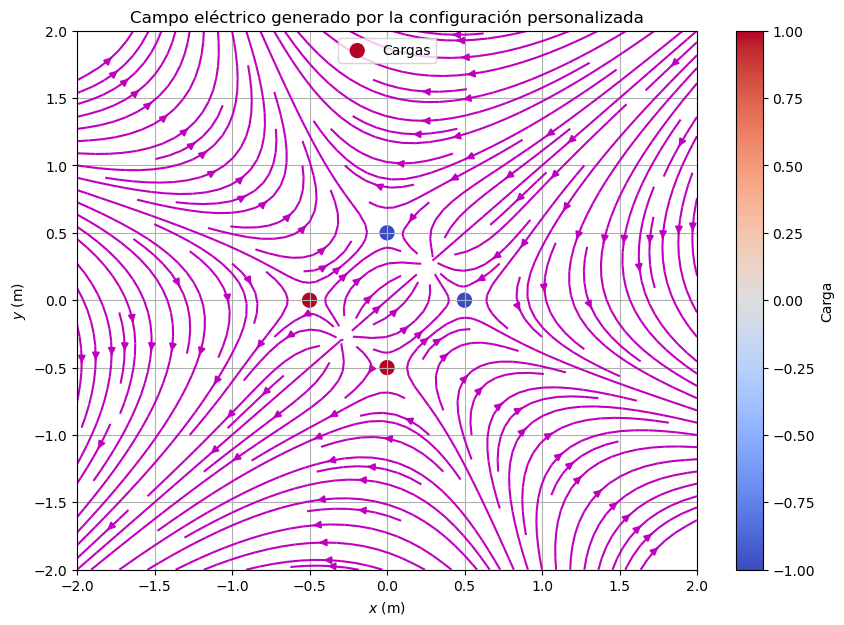

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Función para generar configuraciones de cargas
def dipolo():
    return {
        (-0.5, 0): +1,  # Carga positiva a la izquierda del origen
        (0.5, 0): -1    # Carga negativa a la derecha del origen
    }

def cuadrupolo():
    return {
        (-0.5, 0): +1,  # Carga positiva a la izquierda
        (0.5, 0): -1,   # Carga negativa a la derecha
        (0, -0.5): +1,  # Carga positiva abajo
        (0, 0.5): -1    # Carga negativa arriba
    }

# Función para calcular el campo eléctrico
def campo_electrico(xs, ys, qtopos):
    n = len(xs)
    Exs = np.zeros((n, n))
    Eys = np.zeros((n, n))
    for k, x in enumerate(xs):
        for j, y in enumerate(ys):
            for (posx, posy), charge in qtopos.items():
                dx = x - posx
                dy = y - posy
                r = np.sqrt(dx**2 + dy**2)
                if r > 1e-6:  # Evitar singularidades
                    E = charge / r**2
                    Exs[k, j] += E * (dx / r)
                    Eys[k, j] += E * (dy / r)
    return Exs, Eys

# Función para graficar el campo eléctrico
def grafica_E(box, n, qtopos):
    xs = np.linspace(-box, box, n)
    ys = np.linspace(-box, box, n)
    Exs, Eys = campo_electrico(xs, ys, qtopos)
    plt.figure(figsize=(10, 7))
    plt.streamplot(xs, ys, Exs, Eys, density=1.5, color='m')
    plt.scatter(
        [pos[0] for pos in qtopos.keys()],
        [pos[1] for pos in qtopos.keys()],
        c=list(qtopos.values()),
        cmap="coolwarm",
        s=100,
        label="Cargas",
    )
    plt.title("Campo eléctrico generado por la configuración personalizada")
    plt.xlabel("$x$ (m)")
    plt.ylabel("$y$ (m)")
    plt.colorbar(label="Carga")
    plt.legend()
    plt.grid()
    plt.show()

# Configuraciones principales
if __name__ == "__main__":
    box = 2.0  # Tamaño del área de observación
    n = 50     # Resolución de la malla

    # Configuración Dipolo
    conf_dipolo = dipolo()
    grafica_E(box, n, conf_dipolo)

    # Configuración Cuadrupolo
    conf_cuadrupolo = cuadrupolo()
    grafica_E(box, n, conf_cuadrupolo)


#### 2.24

In [35]:
def kahansum(xs):
    s = 0.; e = 0.
    for x in xs:
        temp = s
        y=x+e
        s = temp + y
        e = (temp - s) + y
    return s


xs = [0.7, 0.1, 0.3]
print(sum(xs), kahansum(xs))

1.0999999999999999 1.1


In [36]:
def chargearray(nvals):
    vals = [-0.5 + i/(nvals-1) for i in range(nvals)] 
    qtopos = {}
    for i,posx in enumerate(vals):
        for j,posy in enumerate(vals): 
            count = j + nvals*i + 1
            key = 1.02*count if (i+j)%2==0 else -count
            qtopos[key] = posx, posy
    return qtopos


def vecmag(rs):
    sq = [r**2 for r in rs]
    return sqrt(kahansum(sq))


def fullpot(qtopos,rs):
    potvals = []
    for q,pos in qtopos.items():
        diffs = [r - po for r,po in zip(rs,pos)] 
        R = vecmag(diffs)
        potvals.append(q/R)
    return kahansum(potvals)



qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = fullpot(qtopos,rs)
    print(rs, potval)


[0.0, 1] 14.648439740503107
[0.0, -1] -0.6582579911707249


In [38]:
def decomp(rs,ris):
    rmag = vecmag(rs); rimag = vecmag(ris) 
    prs = [r*ri for r,ri in zip(rs,ris)] 
    vecdot = kahansum(prs)
    costheta = vecdot/(rmag*rimag)
    return rmag, rimag, costheta


def multicoes(rs,qtopos,nmax=40):
    coes = [0. for n in range(nmax+1)] 
    for n in range(nmax+1):
        for q,pos in qtopos.items():
            rmag, rimag, costheta = decomp(rs,pos)
            val = q*(rimag**n)*legendre(n,costheta)[0] 
            coes[n] += val
    return coes


def multifullpot(rs,qtopos):
    coes = multicoes(rs,qtopos)
    rmag = vecmag(rs)
    contribs = [coe/rmag**(n+1) for n,coe in enumerate(coes)] 
    return kahansum(contribs)


#if __name__ =="main": 
qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = multifullpot(rs,qtopos); print(rs, potval)


#nmax}=40

[0.0, 1] 14.648436141512713
[0.0, -1] -0.6582543867495901


### 2.25 Generalize our code in multipole.py so that it works regardless of whether or not r > ri. This necessitates changes to all three functions in that program.

In [15]:
import numpy as np

def chargearray(nvals):
    vals = [-0.5 + i / (nvals - 1) for i in range(nvals)]  # Creamos el espacio en 3 dimensiones
    qtopos = {}
    
    for i, posx in enumerate(vals):
        for j, posy in enumerate(vals):
            for k, posz in enumerate(vals):  ### Dado que estabamos creando una matriz con 
                ####  rango 3 x val
                count = k + nvals * (j + nvals * i) + 1
                ### Hacemos el contador de tal manera que repitamos lo hecho en 2 dimensiones
                key = 1.02 * count if (i + j + k) % 2 == 0 else -count
                qtopos[key] = (posx, posy, posz)  # Guardamos la matriz resultante
    return qtopos


#### nuestras correciones de dichas sumas, quedan inalteradas. 
def kahansum(xs):
    s = 0
    e = 0
    for x in xs:
        tem = s
        y = x + e
        s = tem + y
        e = (tem - s) + y
    return s

### Calculamos las raices, con las sumas corregidas. 
def vecmag(rs):
    sq = [r**2 for r in rs]
    return np.sqrt(kahansum(sq))

### Finalmente obtenemos los valores del potencial
def fullpot(qtopos, rs):
    portvals = []
    for q, pos in qtopos.items():
        ### Realizamos el calculo de las diferencias de las posiciones.
        diffs = [r - rp for r, rp in zip(rs, pos)] 
        R = vecmag(diffs)
        portvals.append(q / R)
    return kahansum(portvals)

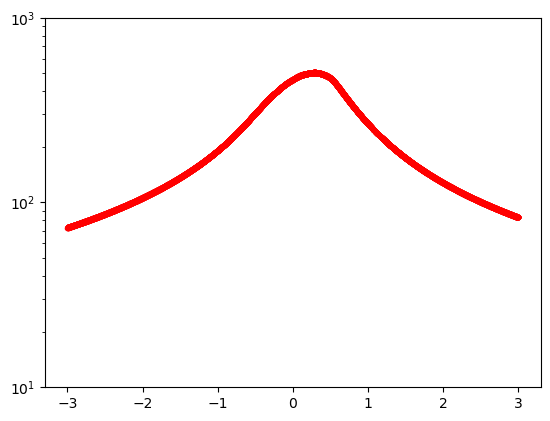

In [16]:
X= np.linspace(-3,3, 8000)
F = fullpot(chargearray(6), [X,0,0])
### Generamos  una grafica con respecto a x
#print(chargearray(36))
plt.semilogy(X,F, 'r.')
plt.ylim((1e1, 1e3))
plt.show()

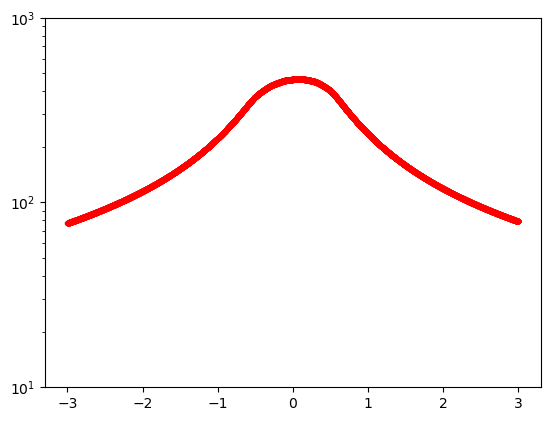

In [17]:
Y= np.linspace(-3,3, 8000)
F = fullpot(chargearray(6), [0,Y,0])
### Creamos una grafica ahora con respecto a Y 
plt.semilogy(Y,F, 'r.')
plt.ylim((1e1, 1e3))
plt.show()

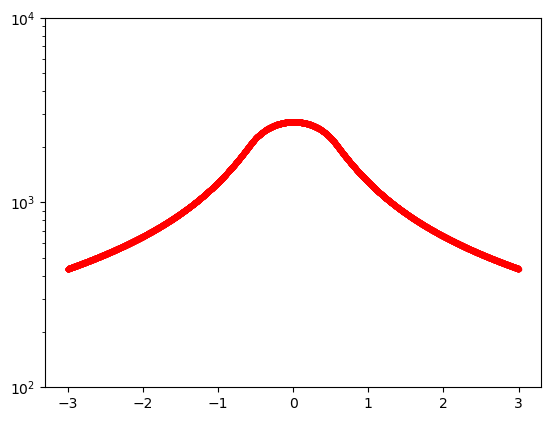

In [18]:
Z= np.linspace(-3,3, 8000)
F = fullpot(chargearray(8), [0,0,Z])
### Generamos una grafica con respecto a z
plt.semilogy(Z,F, 'r.')
plt.ylim((1e2, 1e4))
plt.show()

### 2.26 

Spherical harmonics are very important in gravity, electromagnetism, and quantum mechanics (among several other topics). Here we will visualize them, starting from scratch; to do so, we first have to produce some scaffolding.

The generalization of Bonnet's recurrence relation, Eq. (2.86), for associated Legendre polynomials, takes the form:
    $$
    (n - m) P_n^m(x) = x(2n - 1) P_{n-1}^m(x) - (n + m - 1) P_{n-2}^m(x)
    $$
To get going, you will appreciate having access to:
    $$
    P_n^m(x) = (-1)^m \frac{(2m - 1)!!}{(1 - x^2)^{m/2}} 
    $$
which makes use of the double factorial (the product of odd integers). Another helpful starting expression is:
    $$
    P_n^{m'}(x) = x(2m + 1) P_n^m(x) 
    $$
Compute $P_n^m(x)$ by stepping through Eq. (2.125), making use of Eq. (2.126) and Eq. (2.127) as necessary. Use your function to plot $P_4^2(x)$. The above approach works for $0 \leq m \leq n$. To deal with negative $m$ values, use:
    $$
    P_n^{-m}(x) = (-1)^m \frac{(n - m)!}{(n + m)!} P_n^m(x) \tag{2.128}
    $$
Plot $P_4^2(x)$; if you want, you can compare against \texttt{scipy.special.lpmv()}.
    
Write a Python function that computes the \textit{real spherical harmonics}:
    $$
    Y_{nm}(\theta, \phi) =
    \begin{cases}
        (-1)^m \sqrt{2} \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} P_n^m(\cos \theta) \sin(|m| \phi), & \text{if } m < 0, \\
        \sqrt{\frac{2n+1}{4\pi}} P_n^0(\cos \theta), & \text{if } m = 0, \\
        (-1)^m \sqrt{2} \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} P_n^m(\cos \theta) \cos(m \phi), & \text{if } m > 0.
    \end{cases} \tag{2.129}
    $$
    
Produce a grid for $\theta$ (from $0$ to $\pi$) and a grid for $\phi$ (from $0$ to $2\pi$). Visualize $|Y_{42}|$ using a 3D polar plot, which is conveniently provided by Axes3D.plot\_surface(). Just like in vectorfield.py, you should use nested lists to produce the relevant quantities and switch to NumPy arrays at the last second. Our problem is three-dimensional in Cartesian coordinates, so you will need to pass in as arguments the appropriately converted forms of $|Y_{42}|$, i.e., $|Y_{42}| \cos \phi$, $|Y_{42}| \sin \phi$, and $|Y_{42}| \cos \theta$ (i.e., $|Y_{42}|$ plays the role of the radial component, $r$).


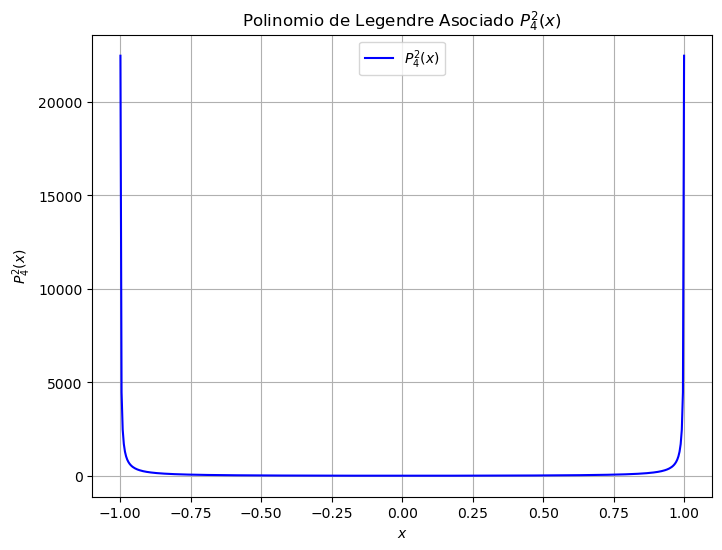

Ejemplos de valores de Y_42(theta, phi):
Theta=0.00, Phi=0.00, Y_42=nan
Theta=0.00, Phi=1.57, Y_42=nan
Theta=0.00, Phi=3.14, Y_42=nan
Theta=0.00, Phi=4.71, Y_42=nan
Theta=0.00, Phi=6.28, Y_42=nan
Theta=0.79, Phi=0.00, Y_42=2.365e+00
Theta=0.79, Phi=1.57, Y_42=-2.365e+00
Theta=0.79, Phi=3.14, Y_42=2.365e+00
Theta=0.79, Phi=4.71, Y_42=-2.365e+00
Theta=0.79, Phi=6.28, Y_42=2.365e+00
Theta=1.57, Phi=0.00, Y_42=-4.731e-01
Theta=1.57, Phi=1.57, Y_42=4.731e-01
Theta=1.57, Phi=3.14, Y_42=-4.731e-01
Theta=1.57, Phi=4.71, Y_42=4.731e-01
Theta=1.57, Phi=6.28, Y_42=-4.731e-01
Theta=2.36, Phi=0.00, Y_42=2.365e+00
Theta=2.36, Phi=1.57, Y_42=-2.365e+00
Theta=2.36, Phi=3.14, Y_42=2.365e+00
Theta=2.36, Phi=4.71, Y_42=-2.365e+00
Theta=2.36, Phi=6.28, Y_42=2.365e+00
Theta=3.14, Phi=0.00, Y_42=nan
Theta=3.14, Phi=1.57, Y_42=nan
Theta=3.14, Phi=3.14, Y_42=nan
Theta=3.14, Phi=4.71, Y_42=nan
Theta=3.14, Phi=6.28, Y_42=nan


C:\Users\ACER\AppData\Local\Temp\ipykernel_16556\3800701874.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  P_mm = (-1)**m * doble_factorial(2*m - 1) / (1 - x**2)**(m/2) if m > 0 else 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_16556\3800701874.py:35: RuntimeWarning: invalid value encountered in double_scalars
  P_next = ((2*k - 1) * x * P_curr - (k + m - 1) * P_prev) / (k - m)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16556\3800701874.py:21: RuntimeWarning: divide by zero encountered in divide
  P_mm = (-1)**m * doble_factorial(2*m - 1) / (1 - x**2)**(m/2) if m > 0 else 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_16556\3800701874.py:35: RuntimeWarning: invalid value encountered in subtract
  P_next = ((2*k - 1) * x * P_curr - (k + m - 1) * P_prev) / (k - m)


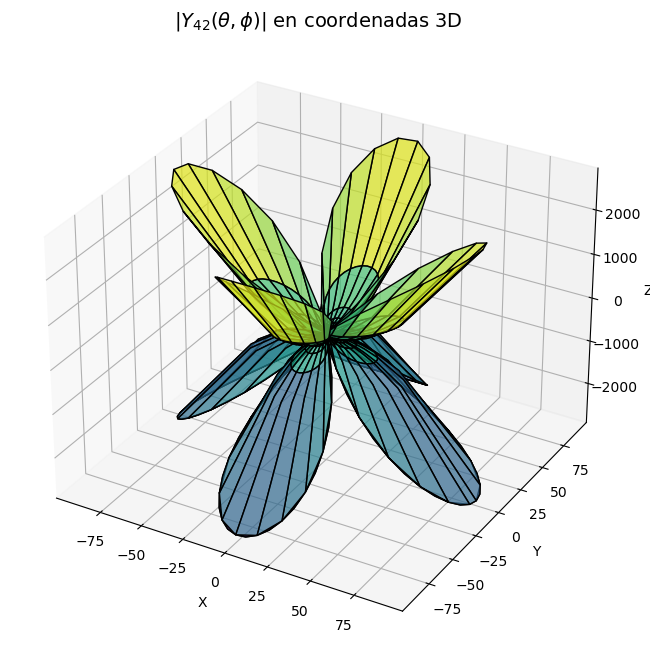

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, sqrt
from mpl_toolkits.mplot3d import Axes3D

# Función para calcular el doble factorial
def doble_factorial(n):
    if n <= 0:
        return 1
    return n * doble_factorial(n - 2)

# Función para calcular los polinomios de Legendre asociados
def legendre_asoc(n, m, x):
    if abs(m) > n:
        return 0  # P_n^m(x) = 0 si |m| > n

    if m < 0:  # Manejar m negativo usando la relación (2.128)
        return (-1)**m * factorial(n - abs(m)) / factorial(n + abs(m)) * legendre_asoc(n, -m, x)

    # Inicialización para m == n usando (2.126)
    P_mm = (-1)**m * doble_factorial(2*m - 1) / (1 - x**2)**(m/2) if m > 0 else 1

    if n == m:
        return P_mm

    # Caso base para n = m + 1
    P_mmp1 = x * (2*m + 1) * P_mm

    if n == m + 1:
        return P_mmp1

    # Recurrencia general para n > m + 1 (2.125)
    P_prev, P_curr = P_mm, P_mmp1
    for k in range(m + 2, n + 1):
        P_next = ((2*k - 1) * x * P_curr - (k + m - 1) * P_prev) / (k - m)
        P_prev, P_curr = P_curr, P_next

    return P_curr

# Función para calcular las armónicas esféricas reales
def esfericas_armonicas(n, m, theta, phi):
    if m < 0:  # Caso m < 0
        prefactor = (-1)**m * np.sqrt(2) * np.sqrt((2*n + 1) / (4 * np.pi) * factorial(n - abs(m)) / factorial(n + abs(m)))
        return prefactor * legendre_asoc(n, abs(m), np.cos(theta)) * np.sin(abs(m) * phi)
    elif m == 0:  # Caso m = 0
        prefactor = np.sqrt((2*n + 1) / (4 * np.pi))
        return prefactor * legendre_asoc(n, 0, np.cos(theta))
    else:  # Caso m > 0
        prefactor = (-1)**m * np.sqrt(2) * np.sqrt((2*n + 1) / (4 * np.pi) * factorial(n - m) / factorial(n + m))
        return prefactor * legendre_asoc(n, m, np.cos(theta)) * np.cos(m * phi)

#a) Graficar P_4^2(x)
x_vals = np.linspace(-0.999, 0.999, 500)  # Evitar ±1
P_4_2_vals = [legendre_asoc(4, 2, x) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, P_4_2_vals, label=r"$P_4^2(x)$", color="b")
plt.title("Polinomio de Legendre Asociado $P_4^2(x)$")
plt.xlabel("$x$")
plt.ylabel("$P_4^2(x)$")
plt.legend()
plt.grid()
plt.show()

#b) Cálculo de armónicas esféricas
n, m = 4, 2
theta = np.linspace(0, np.pi, 5)  # Ejemplo con 5 valores de theta
phi = np.linspace(0, 2*np.pi, 5)  # Ejemplo con 5 valores de phi

# Ejemplo de cálculo para las armónicas esféricas
print("Ejemplos de valores de Y_42(theta, phi):")
for t in theta:
    for p in phi:
        print(f"Theta={t:.2f}, Phi={p:.2f}, Y_42={esfericas_armonicas(n, m, t, p):.3e}")

#c) Visualización en 3D
theta_grid, phi_grid = np.meshgrid(np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100))
Y_42_vals = np.abs(esfericas_armonicas(n, m, theta_grid, phi_grid))

# Convertir a coordenadas cartesianas
x = Y_42_vals * np.sin(theta_grid) * np.cos(phi_grid)
y = Y_42_vals * np.sin(theta_grid) * np.sin(phi_grid)
z = Y_42_vals * np.cos(theta_grid)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_title(r"$|Y_{42}(\theta, \phi)|$ en coordenadas 3D", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


### 2.26 

In [41]:
# Definimos a g como una variable simbólica
g = sym.Symbol("g")

# Definimos la función Ag que calcula la serie hasta el término m
def Ag(m):
    suma = 0
    for i in range(m + 1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma

# Evaluamos la función Ag
Ag(3)


-0.125325520833333*g**3 + 0.0911458333333333*g**2 - 0.125*g + 1.0

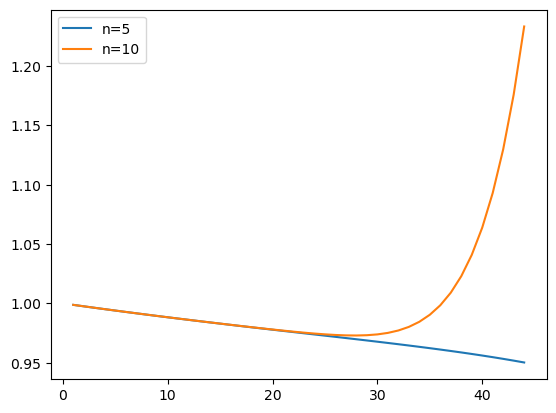

In [42]:
#Definimos Ag nuevamente, tomando valores para g
def AG(m,g):
    suma=0
    for i in range (0,m+1,1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma

AG(2,1)

#Graficamos
g=range(1,45,1)
mp.plot(g,[AG(5,i/100) for i in g], label="n=5")
mp.plot(g,[AG(10,i/100) for i in g],label="n=10")
mp.legend()
mp.show()

In [43]:
#Definimos la función Z
def Z(g):
    Z=np.sqrt(3/(2*np.pi*g))*np.exp(3/(4*g))*sp.kv(0.25,3/(4*g))
    return Z

Z(0.01)

0.9987589917371759

### 2.28  When implementing Hartree–Fock theory for Coulomb interactions, one optionis to employ Gaussian-type orbitals; the (nuclear-attraction) integrals involved in this approach
$fn(x) = \int_0^1 dt ~~ exp(−xt^2)t^{2n}$ 
### obey the following recurrence relation: 
$fn(x) =  \dfrac{(2n − 1) f_{n−1}(x) − e^{−x} }{2x}$ 
which is closer since this involves an x dependence.
### Start with f30(x) = 1 and employ backward recursion to plot f10(x).

[0.04761905 0.04757555 0.04753208 0.04748866 0.04744528 0.04740194
 0.04735864 0.04731537 0.04727215 0.04722897 0.04718583 0.04714272
 0.04709966 0.04705664 0.04701365 0.04697071 0.0469278  0.04688494
 0.04684211 0.04679933 0.04675658 0.04671387 0.0466712  0.04662857
 0.04658598 0.04654343 0.04650092 0.04645845 0.04641601 0.04637362
 0.04633126 0.04628895 0.04624667 0.04620443 0.04616223 0.04612007
 0.04607795 0.04603587 0.04599382 0.04595182 0.04590985 0.04586792
 0.04582603 0.04578418 0.04574236 0.04570059 0.04565885 0.04561716
 0.0455755  0.04553388 0.04549229 0.04545075 0.04540924 0.04536778
 0.04532635 0.04528495 0.0452436  0.04520228 0.04516101 0.04511977
 0.04507857 0.0450374  0.04499628 0.04495519 0.04491414 0.04487313
 0.04483215 0.04479121 0.04475032 0.04470945 0.04466863 0.04462784
 0.04458709 0.04454638 0.04450571 0.04446507 0.04442447 0.04438391
 0.04434339 0.0443029  0.04426245 0.04422204 0.04418166 0.04414132
 0.04410102 0.04406076 0.04402053 0.04398034 0.04394019 0.0439

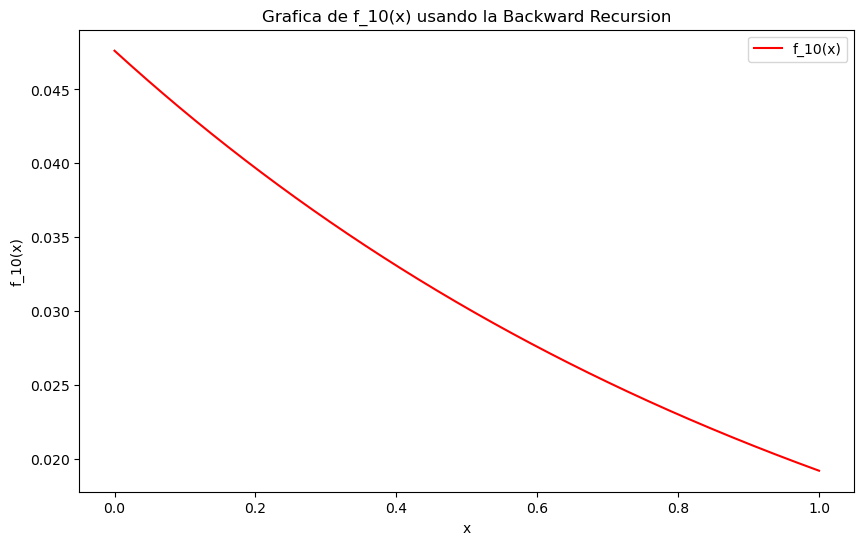

In [19]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

def fn(x, n_empe = 30 , n_fin = 10):
    #### creamos un arreglo  
    f_n_v = {}
    ### A la primera entrada le asignamos nuestro primero valor 
    ### el cual será una entrada de unos (el valor primero de los polinomios de legendre)
    ### p_0 = 1 y p_1 = xm con dimenciones de los x elementos (pasos) que queramos darles 
    f_n_v[n_empe] = np.ones_like(x)
    ### Realizamos la recursión, haciendo pasos hacia atrás de manera unitaria
    for n in range(n_empe, n_fin, -1):
        f_antes = f_n_v[n]
        f_ahora = (   2*x* f_antes + np.exp(-x)   ) / (2*n -1 ) 
        f_n_v[n - 1] = f_ahora
    return f_n_v

### Definimos los valores los cuales x  que va a agarrar nuestra
### recurrencia evitando hacer a x = 0 ya que tendriamos divisiones entre cero
x = np.linspace(0, 1, 1000)  

# definimos las variables a ocupar y aplicamos la función de recurrencia
n_empe = 30
n_fin = 10
f_v = fn(x, n_empe, n_fin)
print(f_v[n_fin])
# Graficamos la figura 
plt.figure(figsize=(10, 6))
#### Graficamos a x vs los valores finales obtendios de nuestra recurrencia
plt.plot(x, f_v[n_fin], label=f'f_{10}(x)', color='red')

plt.xlabel('x')
plt.ylabel(f'f_{n_fin}(x)')
plt.title(f'Grafica de f_{10}(x) usando la Backward Recursion')
plt.legend()
plt.show()